### Project - Predicting heart rate to monitor stress level

#### Domain:
Healthcare

#### Business Context:
Anxiety and stress make your heart work harder. When you’re under stress your body’s “fight or flight” response is triggered i.e. your body tenses, your blood pressure rises and your heart beats faster. Stress hormones may damage the lining of the arteries. In the current scenario post-covid, since most of us are indoors, stress levels are at an all time high due to increasing anxieties which is leading to a higher heart rate. And your body's response to stress may be a headache, back strain, or stomach pains. Stress can also zap your energy, wreak havoc on your sleep and make you feel cranky, forgetful and out of control.

Higher heart rate is not always better since pathological conditions can lead to an increased heart rate. Tachycardia refers to a fast resting heart rate, usually over 100 beats per minute. Tachycardia can be dangerous, depending on its underlying cause and on how hard the heart has to work. 

An optimal level of heart rate is associated with health and self-regulatory capacity, and adaptability or resilience. Higher levels of resting vagally-mediated heart rate are linked to performance of executive functions like attention and emotional processing by the prefrontal cortex.

Higher heart rates are usually connected with higher stress levels. When stress is excessive, it can contribute to everything from high blood pressure, also called hypertension, to asthma to ulcers to irritable bowel syndrome

Stress may affect behaviors and factors that increase heart disease risk: high blood pressure and cholesterol levels, smoking, physical inactivity and overeating. Some people may choose to drink too much alcohol or smoke cigarettes to “manage” their chronic stress, however these habits can increase blood pressure and may damage artery walls.
 
Thus, heart rate can be used to monitor your stress levels and keep it under check as it is a useful indicator of good health.
A recent study speaks about effects of stress on increased heart attacks amongst 30-40 year olds:

https://economictimes.indiatimes.com/magazines/panache/heart-attacks-on-the-rise-among-30-40-year-olds-diabetes-hypertension-are-contributing-factors/articleshow/66997025.cms



#### Data Description:
The data comprises various attributes taken from signals measured using ECG recorded for different individuals having different heart rates at the time the measurement was taken. These various features contribute to the heart rate at the given instant of time for the individual.
 
You have been provided with a total of 7 CSV files with the names as follows:
time_domain_features_train.csv - This file contains all time domain features of heart rate for training data
frequency_domain_features_train.csv - This file  contains all frequency domain features of heart rate for training data
heart_rate_non_linear_features_train.csv - This file contains all non linear features of heart rate for training data
time_domain_features_test.csv -  This file contains all time domain features of heart rate for testing data
frequency_domain_features_test.csv -  This file  contains all frequency domain features of heart rate for testing data
heart_rate_non_linear_features_test.csv - This file contains all non linear features of heart rate for testing data
sample_submission.csv - This file contains the format in which you need to make submissions to the portal

Following is the data dictionary for the features you will come across in the files mentioned:

##### Attribute Information:
MEAN_RR - Mean of RR intervals
MEDIAN_RR - Median of RR intervals
SDRR - Standard deviation of RR intervals
RMSSD - Root mean square of successive RR interval differences
SDSD - Standard deviation of successive RR interval differences
SDRR_RMSSD - Ratio of SDRR / RMSSD
pNN25 - Percentage of successive RR intervals that differ by more than 25 ms
pNN50 - Percentage of successive RR intervals that differ by more than 50 ms
KURT - Kurtosis of distribution of successive RR intervals
SKEW - Skew of distribution of successive RR intervals
MEAN_REL_RR - Mean of relative RR intervals
MEDIAN_REL_RR - Median of relative RR intervals
SDRR_REL_RR - Standard deviation of relative RR intervals
RMSSD_REL_RR - Root mean square of successive relative RR interval differences
SDSD_REL_RR - Standard deviation of successive relative RR interval differences
SDRR_RMSSD_REL_RR - Ratio of SDRR/RMSSD for relative RR interval differences
KURT_REL_RR - Kurtosis of distribution of relative RR intervals
SKEW_REL_RR - Skewness of distribution of relative RR intervals
uuid - Unique ID for each patient
VLF - Absolute power of the very low frequency band (0.0033 - 0.04 Hz)
VLF_PCT - Principal component transform of VLF
LF - Absolute power of the low frequency band (0.04 - 0.15 Hz)
LF_PCT - Principal component transform of LF
LF_NU  - Absolute power of the low frequency band in normal units
HF - Absolute power of the high frequency band (0.15 - 0.4 Hz)
HF_PCT - Principal component transform of HF
HF_NU - Absolute power of the highest frequency band in normal units
TP - Total power of RR intervals
LF_HF - Ratio of LF to HF
HF_LF - Ratio of HF to LF
SD1 - Poincaré plot standard deviation perpendicular to the line of identity
SD2 - Poincaré plot standard deviation along the line of identity
Sampen - sample entropy which measures the regularity and complexity of a time series
higuci - higuci fractal dimension of heartrate
datasetId - ID of the whole dataset
condition - condition of the patient at the time the data was recorded
HR - Heart rate of the patient at the time of data recorded
 

#### Objective:
The objective is to build a regressor model which can predict the heart rate of an individual. This prediction can help to monitor stress levels of the individual.

#### Evaluation Metric:
Mean Absolute Error :

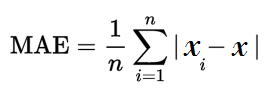

n - total number of predicted samples, xi predicted output, x actual output


#### Import the necessary packages

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Read the dataset into dataframes

In [3]:
time_features = pd.read_csv("./Train Data Zip/time_domain_features_train.csv")
time_features.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [4]:
time_features.shape

(369289, 20)

In [5]:
time_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   KURT               369289 non-null  float64
 10  SKEW               369289 non-null  float64
 11  MEAN_REL_RR        369289 non-null  float64
 12  MEDIAN_REL_RR      369289 non-null  float64
 13  SDRR_REL_RR        369289 non-null  float64
 14  RMSSD_REL_RR       369289 non-null  float64
 15  SDSD_REL_RR        369289 non-null  float64
 16  SD

In [6]:
time_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MEAN_RR,369289.0,846.650104,124.603984,547.492221,760.228533,8.229514e+02,924.117422,1322.016957
MEDIAN_RR,369289.0,841.965890,132.321005,517.293295,755.750735,8.196896e+02,916.821570,1653.122250
SDRR,369289.0,109.352531,77.117025,27.233947,64.205641,8.260824e+01,118.237002,563.486949
RMSSD,369289.0,14.977498,4.120766,5.529742,11.830959,1.441592e+01,17.927144,26.629477
SDSD,369289.0,14.976767,4.120768,5.529630,11.830671,1.441539e+01,17.924839,26.629392
SDRR_RMSSD,369289.0,7.396597,5.143834,2.660381,4.541896,5.952112e+00,7.919841,54.523950
HR,369289.0,73.941824,10.337453,48.737243,66.715776,7.421781e+01,80.334937,113.752309
pNN25,369289.0,9.841143,8.195574,0.000000,3.666667,7.600000e+00,13.333333,39.400000
pNN50,369289.0,0.866001,0.990189,0.000000,0.000000,4.666667e-01,1.466667,5.466667
KURT,369289.0,0.523235,1.790348,-1.894820,-0.352783,4.073622e-02,0.722833,64.088107


In [7]:
# Check to see if data has any missing values
time_features.isnull().values.any()

False

In [8]:
frequency_features = pd.read_csv("./Train Data Zip/frequency_domain_features_train.csv")
frequency_features.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [9]:
frequency_features.shape

(369289, 12)

In [10]:
frequency_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   uuid     369289 non-null  object 
 1   VLF      369289 non-null  float64
 2   VLF_PCT  369289 non-null  float64
 3   LF       369289 non-null  float64
 4   LF_PCT   369289 non-null  float64
 5   LF_NU    369289 non-null  float64
 6   HF       369289 non-null  float64
 7   HF_PCT   369289 non-null  float64
 8   HF_NU    369289 non-null  float64
 9   TP       369289 non-null  float64
 10  LF_HF    369289 non-null  float64
 11  HF_LF    369289 non-null  float64
dtypes: float64(11), object(1)
memory usage: 33.8+ MB


In [11]:
frequency_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VLF,369289.0,2199.580170,1815.773422,159.480176,1001.189280,1667.903111,2654.121052,12617.977191
VLF_PCT,369289.0,64.289242,16.774844,19.031219,52.909877,66.350237,76.825032,97.738848
LF,369289.0,946.530252,574.171780,90.048557,545.449386,782.716291,1201.432256,3291.548112
LF_PCT,369289.0,34.095182,16.040290,2.165119,22.305936,32.047025,44.647115,77.928847
LF_NU,369289.0,95.566718,4.123365,69.879083,93.645734,96.643140,98.771946,99.987175
HF,369289.0,39.245603,45.398869,0.061783,10.720312,24.841938,45.272368,364.486936
HF_PCT,369289.0,1.615576,1.761073,0.002150,0.346803,1.039513,2.245115,13.095664
HF_NU,369289.0,4.433282,4.123365,0.012825,1.228054,3.356860,6.354266,30.120917
TP,369289.0,3185.356025,1923.227187,377.692795,1828.147788,2796.856587,4052.260157,13390.684098
LF_HF,369289.0,115.977200,360.855129,2.319952,14.737458,28.789747,80.429614,7796.443096


In [12]:
# Check to see if data has any missing values
frequency_features.isnull().values.any()

False

In [13]:
non_linear_features = pd.read_csv("./Train Data Zip/heart_rate_non_linear_features_train.csv")
non_linear_features.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress


In [14]:
non_linear_features.shape

(369289, 7)

In [15]:
non_linear_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   uuid       369289 non-null  object 
 1   SD1        369289 non-null  float64
 2   SD2        369289 non-null  float64
 3   sampen     369289 non-null  float64
 4   higuci     369289 non-null  float64
 5   datasetId  369289 non-null  int64  
 6   condition  369289 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 19.7+ MB


In [16]:
# Check to see if data has any missing values
non_linear_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SD1,369289.0,10.593708,2.914795,3.911344,8.368340,10.196621,12.679005,18.836107
SD2,369289.0,154.178997,109.170222,38.307745,90.326864,116.221063,166.764850,796.852945
sampen,369289.0,2.062471,0.206999,0.434576,2.032977,2.134214,2.181929,2.234841
higuci,369289.0,1.182292,0.062192,1.033984,1.139929,1.174293,1.223621,1.361219
datasetId,369289.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [17]:
non_linear_features.isnull().values.any()

False

#### Observations: 
<ul>
    <li>All the columns of the three datasets have the same number of non-null values.</li>
       <li>No Null Values are present.</li>
</ul>

#### Observations from Descriptive Statistics

For the columns 'Age', and 'Experience' the mean is almost similar to median and so we can say that both 'Age' and 'Experience' are normally distributed. 

    For the other three columns 'Income', 'CCAvg' and 'Mortgage' the mean is greater than median, so we can say that they are right(positively) skewed.1

In [18]:
merged_features = pd.merge(time_features, frequency_features, on=['uuid'])
merged_features_total = pd.merge(merged_features, non_linear_features, on=['uuid'])
merged_features_total.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,...,1.514737,3686.666157,65.018055,0.015380,11.001565,199.061782,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,...,0.304603,3006.487251,327.296635,0.003055,9.170129,114.634458,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,...,1.049528,2685.879461,94.280910,0.010607,11.533417,118.939253,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,...,1.775294,3434.520980,55.328701,0.018074,11.119476,127.318597,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,...,3.279993,2621.175204,29.487873,0.033912,13.590641,87.718281,2.221121,1.249612,2,no stress


In [19]:
merged_features_total.shape

(369289, 37)

In [20]:
merged_features_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   KURT               369289 non-null  float64
 10  SKEW               369289 non-null  float64
 11  MEAN_REL_RR        369289 non-null  float64
 12  MEDIAN_REL_RR      369289 non-null  float64
 13  SDRR_REL_RR        369289 non-null  float64
 14  RMSSD_REL_RR       369289 non-null  float64
 15  SDSD_REL_RR        369289 non-null  float64
 16  SD

In [21]:
# Check the unique values in each column of the dataframe
merged_features_total.nunique()

MEAN_RR              369289
MEDIAN_RR            106329
SDRR                 369289
RMSSD                369289
SDSD                 369289
SDRR_RMSSD           369289
HR                   369289
pNN25                   592
pNN50                    83
KURT                 369289
SKEW                 369289
MEAN_REL_RR          369289
MEDIAN_REL_RR         25041
SDRR_REL_RR          369289
RMSSD_REL_RR         369289
SDSD_REL_RR          369289
SDRR_RMSSD_REL_RR    369289
KURT_REL_RR          369289
SKEW_REL_RR          369289
uuid                 369289
VLF                  369289
VLF_PCT              369289
LF                   369289
LF_PCT               369289
LF_NU                369289
HF                   369289
HF_PCT               369289
HF_NU                369289
TP                   369289
LF_HF                369289
HF_LF                369289
SD1                  369289
SD2                  369289
sampen                82511
higuci               369289
datasetId           

In [22]:
merged_features_total.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT',
       'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2',
       'sampen', 'higuci', 'datasetId', 'condition'],
      dtype='object')

In [23]:
import dtale
#dtale.show(merged_features_total)

In [24]:
import pandas_profiling
#merged_features_total.profile_report()

#### Observations from Pandas Profiling Report

 From the profiling report generated above, we can see that the combined dataset has:
 
34 numeric variables: 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT',
       'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2',
       'sampen' and 'higuci'
 
 3 categorical variables: ‘uuid’, 'datasetId' and 'condition' 

 
datasetId has constant value "369289"	
MEDIAN_RR is highly correlated with MEAN_RR and 1 other fields	High correlation
MEAN_RR is highly correlated with MEDIAN_RR and 1 other fields	High correlation
SDSD is highly correlated with RMSSD and 2 other fields	High correlation
RMSSD is highly correlated with SDSD and 2 other fields	High correlation
SDRR_RMSSD is highly correlated with SDRR and 1 other fields	High correlation
SDRR is highly correlated with SDRR_RMSSD and 1 other fields	High correlation
HR is highly correlated with MEAN_RR and 1 other fields	High correlation
pNN25 is highly correlated with RMSSD and 3 other fields	High correlation
SDSD_REL_RR is highly correlated with RMSSD_REL_RR	High correlation
RMSSD_REL_RR is highly correlated with SDSD_REL_RR	High correlation
KURT_REL_RR is highly correlated with KURT	High correlation
KURT is highly correlated with KURT_REL_RR	High correlation
SKEW_REL_RR is highly correlated with SKEW	High correlation
SKEW is highly correlated with SKEW_REL_RR	High correlation
LF is highly correlated with pNN25	High correlation
LF_PCT is highly correlated with VLF_PCT	High correlation
VLF_PCT is highly correlated with LF_PCT	High correlation
HF_NU is highly correlated with LF_NU and 1 other fields	High correlation
LF_NU is highly correlated with HF_NU and 1 other fields	High correlation
TP is highly correlated with VLF	High correlation
VLF is highly correlated with TP	High correlation
HF_LF is highly correlated with LF_NU and 1 other fields	High correlation
SD1 is highly correlated with RMSSD and 2 other fields	High correlation
SD2 is highly correlated with SDRR and 1 other fields	High correlation

### Categorical columns

In [25]:
# Value counts of all categorical columns
print('Categorical Column - Condition')
print(merged_features_total['condition'].value_counts())
print()
print('Categorical Column - uuid')
print(merged_features_total['uuid'].value_counts())
print()
print('Categorical Column - datasetId')
print(merged_features_total['datasetId'].value_counts())

Categorical Column - Condition
no stress        200082
interruption     105150
time pressure     64057
Name: condition, dtype: int64

Categorical Column - uuid
551cacff-98be-4eb7-9d45-151a399082ab    1
b27b8191-1bf3-4654-9ea9-52c5ccfd6e66    1
6c13a356-89c2-46ad-a89c-749b306b392a    1
7b2d8752-9509-4581-9d66-1ef7f84dedae    1
5989929e-541f-4945-aecf-3d0724c8117a    1
                                       ..
7733da3a-2fab-4daf-8043-993356658e6d    1
7a4f4e13-593a-4cdb-aa80-159cf04a7ced    1
5be581f5-8aae-4a47-8cd7-15cf6f47dd65    1
a59d3035-8e3b-43c4-8d4e-4f93316570fb    1
dce60e34-bf34-4aef-a433-504cb8c71db1    1
Name: uuid, Length: 369289, dtype: int64

Categorical Column - datasetId
2    369289
Name: datasetId, dtype: int64


In [26]:
# Drop the attribute datasetId as it seems to be the same for all the data and does not offer any additional insights into predicting the heartrate.
merged_features_total = merged_features_total.drop('datasetId', axis=1)

In [27]:
merged_features_total.shape

(369289, 36)

In [28]:
merged_features_total.info

<bound method DataFrame.info of             MEAN_RR    MEDIAN_RR        SDRR      RMSSD       SDSD  \
0        885.157845   853.763730  140.972741  15.554505  15.553371   
1        939.425371   948.357865   81.317742  12.964439  12.964195   
2        898.186047   907.006860   84.497236  16.305279  16.305274   
3        881.757865   893.460030   90.370537  15.720468  15.720068   
4        809.625331   811.184865   62.766242  19.213819  19.213657   
...             ...          ...         ...        ...        ...   
369284   721.396910   721.533965   36.377559   9.609941   9.609936   
369285   984.266492   978.622945   74.918433  13.762274  13.761705   
369286  1025.499743  1024.968400   95.309200  23.051254  23.050395   
369287   798.123167   803.559610   78.449897  16.736686  16.736657   
369288   814.428911   815.178790   67.697387  20.649551  20.649546   

        SDRR_RMSSD         HR      pNN25     pNN50      KURT  ...    HF_PCT  \
0         9.063146  69.499952  11.133333  0.5333

In [29]:
# Convert categorical variable into dummy/indicator variables using One hot encoding.
merged_features_total = pd.get_dummies(merged_features_total, columns=['condition'])
merged_features_total

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,condition_interruption,condition_no stress,condition_time pressure
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,...,3686.666157,65.018055,0.015380,11.001565,199.061782,2.139754,1.163485,0,1,0
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,...,3006.487251,327.296635,0.003055,9.170129,114.634458,2.174499,1.084711,1,0,0
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,...,2685.879461,94.280910,0.010607,11.533417,118.939253,2.135350,1.176315,1,0,0
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,...,3434.520980,55.328701,0.018074,11.119476,127.318597,2.178341,1.179688,0,1,0
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,...,2621.175204,29.487873,0.033912,13.590641,87.718281,2.221121,1.249612,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,36.377559,9.609941,9.609936,3.785409,83.384647,0.933333,0.000000,1.007321,...,649.351702,8.190908,0.122087,6.797519,50.994582,2.096850,1.314910,0,1,0
369285,984.266492,978.622945,74.918433,13.762274,13.761705,5.443754,61.314243,6.333333,0.200000,0.248964,...,2278.456746,278.683532,0.003588,9.734243,105.502548,2.131264,1.175975,0,1,0
369286,1025.499743,1024.968400,95.309200,23.051254,23.050395,4.134664,59.028594,30.400000,2.066667,-0.429686,...,4331.259564,554.340761,0.001804,16.304530,133.797793,2.215643,1.140232,0,1,0
369287,798.123167,803.559610,78.449897,16.736686,16.736657,4.687302,75.978628,10.000000,1.466667,0.600389,...,2930.056129,27.384942,0.036516,11.838553,110.311474,2.091628,1.181937,0,1,0


In [30]:
# Lets analysze the distribution of the dependent ('HR') attribute
merged_features_total.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MEAN_RR,369289.0,846.650104,124.603984,547.492221,760.228533,8.229514e+02,924.117422,1322.016957
MEDIAN_RR,369289.0,841.965890,132.321005,517.293295,755.750735,8.196896e+02,916.821570,1653.122250
SDRR,369289.0,109.352531,77.117025,27.233947,64.205641,8.260824e+01,118.237002,563.486949
RMSSD,369289.0,14.977498,4.120766,5.529742,11.830959,1.441592e+01,17.927144,26.629477
SDSD,369289.0,14.976767,4.120768,5.529630,11.830671,1.441539e+01,17.924839,26.629392
SDRR_RMSSD,369289.0,7.396597,5.143834,2.660381,4.541896,5.952112e+00,7.919841,54.523950
HR,369289.0,73.941824,10.337453,48.737243,66.715776,7.421781e+01,80.334937,113.752309
pNN25,369289.0,9.841143,8.195574,0.000000,3.666667,7.600000e+00,13.333333,39.400000
pNN50,369289.0,0.866001,0.990189,0.000000,0.000000,4.666667e-01,1.466667,5.466667
KURT,369289.0,0.523235,1.790348,-1.894820,-0.352783,4.073622e-02,0.722833,64.088107


In [31]:
merged_features_total.dtypes

MEAN_RR                    float64
MEDIAN_RR                  float64
SDRR                       float64
RMSSD                      float64
SDSD                       float64
SDRR_RMSSD                 float64
HR                         float64
pNN25                      float64
pNN50                      float64
KURT                       float64
SKEW                       float64
MEAN_REL_RR                float64
MEDIAN_REL_RR              float64
SDRR_REL_RR                float64
RMSSD_REL_RR               float64
SDSD_REL_RR                float64
SDRR_RMSSD_REL_RR          float64
KURT_REL_RR                float64
SKEW_REL_RR                float64
uuid                        object
VLF                        float64
VLF_PCT                    float64
LF                         float64
LF_PCT                     float64
LF_NU                      float64
HF                         float64
HF_PCT                     float64
HF_NU                      float64
TP                  

In [32]:
#sns.pairplot(data = features_attr,diag_kind ='kde');

### Distribution of Target variable

In [33]:
merged_features_total.HR.nunique()

369289

In [34]:
merged_features_total['HR'].value_counts()

74.794596    1
77.731740    1
82.417305    1
84.472649    1
81.096411    1
            ..
79.320918    1
62.087438    1
67.008122    1
70.370847    1
70.042347    1
Name: HR, Length: 369289, dtype: int64

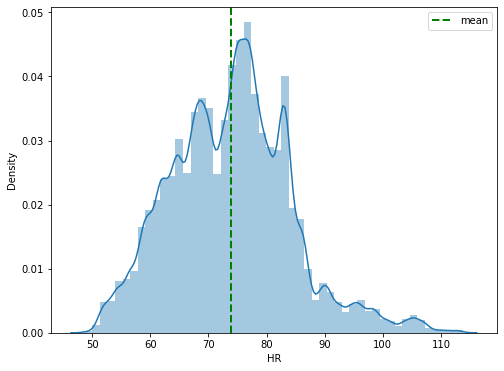

In [35]:
# Plot the distribution of the target attribute
plt.figure(figsize=(8,6))
sns.distplot(merged_features_total['HR']);
plt.axvline(merged_features_total['HR'].mean(), linestyle="dashed", color="g", label='mean', linewidth=2)
plt.legend(loc="best")
plt.show()

In [36]:
# Identify duplicates records in the data

dupes = merged_features_total.duplicated()
sum(dupes)

0

In [37]:
duplicates = merged_features_total[merged_features_total.duplicated('uuid')] 
print("Duplicate Rows :") 
# Print the resultant Dataframe 
duplicates 

Duplicate Rows :


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,condition_interruption,condition_no stress,condition_time pressure


#### No duplicates found

## Bivariate Analysis

## Multivariate Analysis

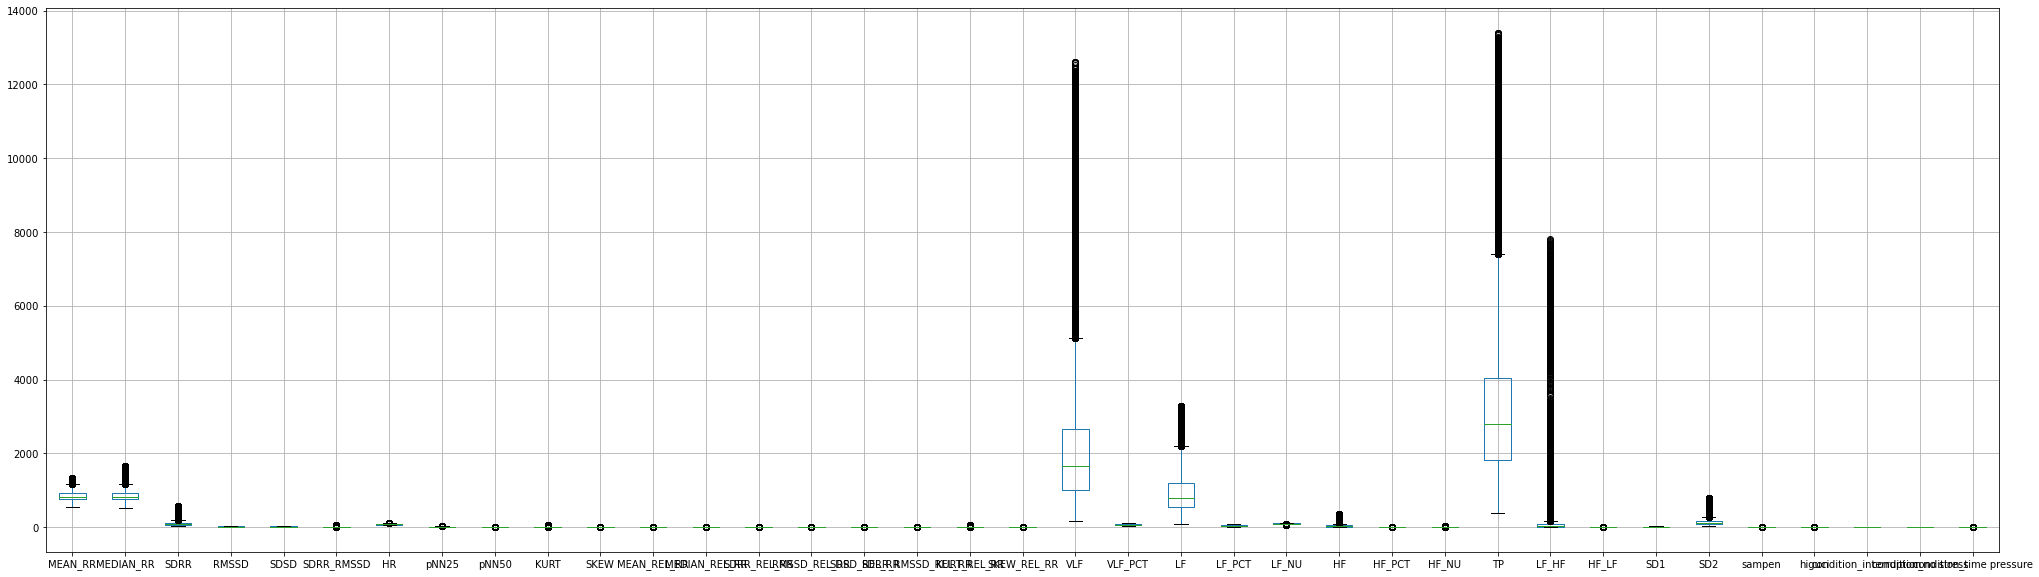

In [38]:
plt.figure(figsize = (35,10))
merged_features_total.boxplot();

In [39]:
merged_features_total.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT',
       'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2',
       'sampen', 'higuci', 'condition_interruption', 'condition_no stress',
       'condition_time pressure'],
      dtype='object')

In [40]:
# Dropping the irrelevant attributes
merged_features_new = merged_features_total.drop('uuid', axis=1)

In [41]:
merged_features_new.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU',
       'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen',
       'higuci', 'condition_interruption', 'condition_no stress',
       'condition_time pressure'],
      dtype='object')

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.preprocessing import MinMaxScaler


In [43]:
X = merged_features_new.drop('HR',axis=1)
y = merged_features_new['HR']

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

def print_model_scores(model,X_train,X_test,y_train,y_test):
    pred = model.predict(X_test)
    # Calculate the score of Linear Regression
    print('Training score  :', model.score(X_train, y_train))
    print('Testing score   :', model.score(X_test, y_test))
    # Mean Absolute Error
    MSE = mean_squared_error(y_test, pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print('Mean Absolute Error:',MAE)
    print('Mean Squared Error:',MSE)
    print('Root Mean Squared Error:',RMSE)
    print('r2 score',r2)
    
    


In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=14)

print(X_train.columns)



Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'pNN25',
       'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR',
       'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR',
       'SKEW_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF',
       'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen',
       'higuci', 'condition_interruption', 'condition_no stress',
       'condition_time pressure'],
      dtype='object')


### Model building using Linear Regression 

In [46]:
from sklearn.linear_model import LinearRegression


lr_pipe = Pipeline([("scale", StandardScaler()),
                 ("lr", LinearRegression())
                ])


lr_pipe.fit(X_train, y_train) 
    
print_model_scores(lr_pipe,X_train,X_test,y_train,y_test)


Training score  : 0.9809786603241765
Testing score   : 0.9807789500678459
Mean Absolute Error: 0.9621630788489367
Mean Squared Error: 2.0597485969403606
Root Mean Squared Error: 1.4351824263627118
r2 score 0.9807789500678459


### Support Vector Machine

In [47]:
# Import svm model

from sklearn import svm
from sklearn.svm import LinearSVR


svr_pipe = Pipeline([("scale", StandardScaler()),
                      ("svr", LinearSVR())
                    ])


svr_pipe.fit(X_train, y_train) 


print_model_scores(svr_pipe,X_train,X_test,y_train,y_test)

Training score  : 0.977861699089795
Testing score   : 0.9776709946960424
Mean Absolute Error: 0.8786320763424135
Mean Squared Error: 2.392800471787039
Root Mean Squared Error: 1.5468679555110834
r2 score 0.9776709946960424


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
rf_pipe = Pipeline([("scale", StandardScaler()),
                 ("reduce_dims", PCA(n_components=0.95)),
                 ("rf",  RandomForestRegressor(random_state=42))
                ])

rf_pipe.fit(X_train, y_train) 

print_model_scores(rf_pipe,X_train,X_test,y_train,y_test)

Training score  : 0.9999717058284809
Testing score   : 0.9998351010750945
Mean Absolute Error: 0.03677798209857388
Mean Squared Error: 0.017670747977345826
Root Mean Squared Error: 0.13293136566418712
r2 score 0.9998351010750945


# Ridge Regression

In [49]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [50]:
rr_pipe = Pipeline([("scale", StandardScaler()),
                 ("reduce_dims", PCA(n_components=0.95)),
                 ("ridge", Ridge())
                ])


rr_pipe.fit(X_train, y_train) 

print_model_scores(rr_pipe,X_train,X_test,y_train,y_test)

Training score  : 0.9455848898559804
Testing score   : 0.945444203496562
Mean Absolute Error: 1.7466146438492152
Mean Squared Error: 5.846258435390608
Root Mean Squared Error: 2.4179037274859825
r2 score 0.945444203496562


In [51]:
grid_rr_pipe = Pipeline([("scale", StandardScaler()),
                 ("reduce_dims", PCA(n_components=0.95)),
                 ("ridge", Ridge())
                ])


param_grid = dict(reduce_dims__n_components = [0.90,0.95,0.99],
                  ridge__alpha = np.logspace(-5, 5, 10),
                  ridge__fit_intercept = [True, False],
                 )

grid = GridSearchCV(grid_rr_pipe, param_grid=param_grid, cv=3,verbose=3,n_jobs=-1)
grid.fit(X_train,y_train)

print_model_scores(grid,X_train,X_test,y_train,y_test)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.4min finished


Training score  : 0.9596356481633125
Testing score   : 0.9590440627679124
Mean Absolute Error: 1.330727215445009
Mean Squared Error: 4.38888273782844
Root Mean Squared Error: 2.094966046939291
r2 score 0.9590440627679124


In [52]:
# from sklearn.ensemble import RandomForestRegressor
# rforest = RandomForestRegressor(random_state=42)
# rforest = rforest.fit(X_train, y_train)

# print_model_scores(rforest,X_train,X_test,y_train,y_test)

In [53]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

In [54]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 4)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

# print_model_scores(rf_random,X_train,X_test,y_train,y_test)

# Test Model 

In [59]:
test_time_features = pd.read_csv("./Test Zip/time_domain_features_test.csv")
test_frequency_features = pd.read_csv("./Test Zip/frequency_domain_features_test.csv")
test_non_linear_features = pd.read_csv("./Test Zip/heart_rate_non_linear_features_test.csv")

test_merged_features = pd.merge(test_time_features, test_frequency_features, on=['uuid'])
test_merged_features_total = pd.merge(test_merged_features, test_non_linear_features, on=['uuid'])
test_merged_features_total.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,...,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition
0,934.665288,939.03173,82.139495,11.801781,11.801772,6.959924,3.933333,0.133333,-0.680262,-0.233075,...,0.521803,2442.168645,190.643094,0.005245,8.347898,115.862444,2.209659,1.100715,2,time pressure
1,817.062380,816.33879,55.492332,20.558810,20.558768,2.699200,24.600000,0.533333,-0.034454,-0.051689,...,2.490788,2162.409316,39.147940,0.025544,14.542096,77.118903,2.186132,1.290615,2,no stress
2,876.762022,894.19889,88.690820,13.853737,13.853730,6.401942,7.066667,0.533333,-0.206953,-0.589940,...,2.170614,2771.583978,45.069921,0.022188,9.799336,125.044377,2.051571,1.226663,2,no stress
3,1038.640693,998.91429,213.725850,16.457194,16.454801,12.986774,10.800000,1.866667,-0.820407,0.487198,...,1.182194,6357.550689,83.588517,0.011963,11.639185,302.029812,2.080910,1.085143,2,time pressure
4,774.548508,778.90508,51.577855,10.273114,10.273049,5.020664,2.000000,0.066667,1.738453,-0.005082,...,8.194943,1373.104689,11.202647,0.089265,7.266567,72.579248,2.068728,1.252547,2,interruption


In [60]:
# Scale/Normalize the data 

test_merged_features_total = pd.get_dummies(test_merged_features_total, columns=['condition'])
X_Test_= test_merged_features_total.drop(['uuid','datasetId'], axis=1)







In [61]:
y_predict_ = rf_pipe.predict(X_Test_)
print(y_predict_)
test_merged_features_total['HR']=y_predict_


[64.71515879 73.69528655 69.19471008 ... 61.01299723 77.40909862
 76.62662282]


In [62]:
test_merged_features_total[['uuid','HR']].to_csv("result.csv",index=False)